In [16]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from IPython.display import Audio
import os

def generate_pure_sinewave(fs, N, f, A):
    time = np.arange(N)/fs
    signal = A*np.cos(2*np.pi*f*time)

    x_n = signal/max(abs(signal))

    return x_n, time

def generate_abrubt_sinewave(fs, N, f, A):
    time = np.arange(N)/fs
    signal1 = A*np.sin(2*np.pi*f*time[N//2:])
    signal2 = A*np.cos(2*np.pi*f*1.2*time[:N//2])
    signal = np.concatenate((signal1, signal2))

    x_n = signal/max(abs(signal))

    return  x_n, time

def get_note():
    fs, signal = sp.io.wavfile.read("B_oboe.wav")
    x_n = signal/max(abs(signal))               # Scale sample values to the range -1 < x[n] < 1
    N = len(x_n)
    time = np.arange(N)/fs

    return fs, x_n, time, N

def get_voice():
    fs, signal = sp.io.wavfile.read("Zauberflöte_vocal.wav")
    x_n = signal/max(abs(signal))
    N = len(x_n)
    time = np.arange(N)/fs

    return  fs, x_n, time, N

def generate_noisy_signal(signal, SNR_N, Noise_A):
    N = len(signal)

    noisy_signal = np.zeros(N)

    SNR = np.logspace(-2,2, num=SNR_N)
    noise_vars = (((Noise_A)**2)/2)/(1/SNR)

    for index, noise_var in enumerate(noise_vars):
        noise = np.random.normal(scale=np.sqrt(noise_var), size=(N//SNR_N))
        noisy_signal[N//SNR_N*index:N//SNR_N*index+N//SNR_N] = signal[N//SNR_N*index:N//SNR_N*index+N//SNR_N] + noise.copy()

    return noisy_signal

print(os.getcwd())

/home/jalma/Documents/GitHub/AIS2201-Project/python


In [54]:
def simple_detection(sample):
    fs = 48000
    N = len(sample)

    Xm = sp.fft.rfft(sample).__abs__()
    #frequencies = sp.fft.rfftfreq(N, 1 / fs)

    f_est = np.argmax(Xm)*fs/N

    return f_est, N/fs
    


400.0


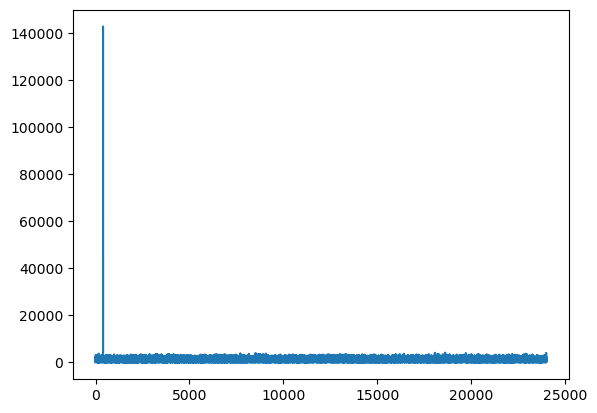

In [55]:
sampling_freq = 48000
time_in_seconds = 6
samples = sampling_freq*time_in_seconds
frequency = 400
Amplitude = 1

pure_tone, time = generate_pure_sinewave(sampling_freq, samples, frequency, Amplitude)

noisy_pure_tone = generate_noisy_signal(pure_tone,1000, Amplitude)


display(Audio(noisy_pure_tone, rate=sampling_freq))

#plt.plot(time, noisy_pure_tone)

Xm = sp.fft.rfft(noisy_pure_tone).__abs__()
frequencies = sp.fft.rfftfreq(samples, 1 / sampling_freq)

f_est = np.argmax(Xm)*sampling_freq/samples

print(f_est)

plt.plot(frequencies, Xm)

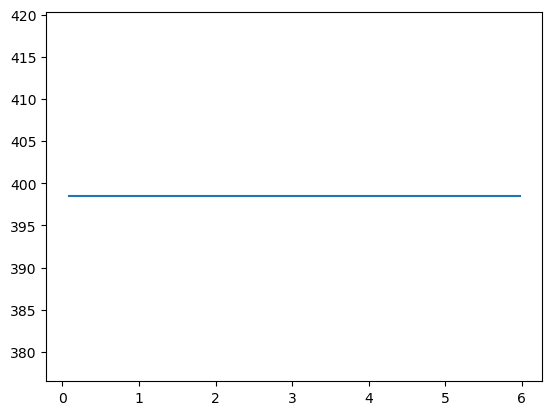

In [56]:
bufferSize = 4096 #Samples in buffer

freq_est = []
time_est = [0]

for index in range(len(noisy_pure_tone)//bufferSize):
    f_est, t = simple_detection(noisy_pure_tone[index*bufferSize:index*bufferSize+bufferSize])

    freq_est.append(f_est)
    time_est.append(t+time_est[-1])

plt.plot(time_est[1:], freq_est)

In [44]:

abrubt_tone, time = generate_abrubt_sinewave(sampling_freq, samples, frequency, Amplitude)
#plt.plot(time, shittone)
noisy_abrubt_tone = generate_noisy_signal(abrubt_tone,100,Amplitude)

display(Audio(noisy_abrubt_tone, rate=sampling_freq))

In [40]:
note_fs, note_signal, time, sample, = get_note()

noisy_note = generate_noisy_signal(note_signal, 100, Amplitude)

display(Audio(noisy_note, rate=note_fs))

In [42]:
fs3, voice, time, N = get_voice()

noisy_voice = generate_noisy_signal(voice,100,Amplitude)

display(Audio(noisy_voice, rate=fs3))